In [1]:
import pandas as pd
import numpy as np

# 히트맵 그려보기
# %amtplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
weather = pd.read_csv('C:/project22/revised_final_fire_weather_7yr.csv')

In [3]:

r = 0.7
r2 = 0.7*0.7
r3 = 0.7*0.7*0.7
r4 = 0.7*0.7*0.7*0.7

for i in range(len(weather)):
    if i == 0 :
        weather.loc[i, '일평균실효습도'] = (1-r)*(weather.loc[i, '일평균상대습도'])
    elif i == 1:
        weather.loc[i, '일평균실효습도'] = (1-r)*(weather.loc[i, '일평균상대습도'] + r*weather.loc[i-1,'일평균상대습도'])
    elif i == 2:
        weather.loc[i, '일평균실효습도'] = (1-r)*(weather.loc[i, '일평균상대습도'] + r*weather.loc[i-1,'일평균상대습도'] + r2*weather.loc[i-2,'일평균상대습도'] )
    elif i == 3:
        weather.loc[i, '일평균실효습도'] = (1-r)*(weather.loc[i, '일평균상대습도'] + r*weather.loc[i-1,'일평균상대습도'] + r2*weather.loc[i-2,'일평균상대습도'] + r3*weather.loc[i-3,'일평균상대습도'])
    else:
        weather.loc[i, '일평균실효습도'] = (1-r)*(weather.loc[i, '일평균상대습도'] + r*weather.loc[i-1,'일평균상대습도'] + r2*weather.loc[i-2,'일평균상대습도'] + r3*weather.loc[i-3,'일평균상대습도'] + r4*weather.loc[i-4,'일평균상대습도'])         

In [4]:
r = 0.7
r2 = 0.7*0.7
r3 = 0.7*0.7*0.7
r4 = 0.7*0.7*0.7*0.7

for i in range(len(weather)):
    if i == 0 :
        weather.loc[i, '일최소실효습도'] = (1-r)*(weather.loc[i, '일최소상대습도'])
    elif i == 1:
        weather.loc[i, '일최소실효습도'] = (1-r)*(weather.loc[i, '일최소상대습도'] + r*weather.loc[i-1,'일최소상대습도'])
    elif i == 2:
        weather.loc[i, '일최소실효습도'] = (1-r)*(weather.loc[i, '일최소상대습도'] + r*weather.loc[i-1,'일최소상대습도'] + r2*weather.loc[i-2,'일최소상대습도'] )
    elif i == 3:
        weather.loc[i, '일최소실효습도'] = (1-r)*(weather.loc[i, '일최소상대습도'] + r*weather.loc[i-1,'일최소상대습도'] + r2*weather.loc[i-2,'일최소상대습도'] + r3*weather.loc[i-3,'일최소상대습도'])
    else:
        weather.loc[i, '일최소실효습도'] = (1-r)*(weather.loc[i, '일최소상대습도'] + r*weather.loc[i-1,'일최소상대습도'] + r2*weather.loc[i-2,'일최소상대습도'] + r3*weather.loc[i-3,'일최소상대습도'] + r4*weather.loc[i-4,'일최소상대습도'])        

In [5]:
# # 무강수 일수?
# day = 0
# # weather.loc[i, '실효습도']

# for i in range(len(weather)):
#     rain = weather.loc[i, '일강수량']
#     if rain > 0:
#         day = 0
#         weather.loc[i, '무강수 일수'] = day
#     else:
#         day = day + 1
#         weather.loc[i, '무강수 일수'] = day


In [6]:
weather['관측일'] =  (weather['관측일']).astype('str')
weather['발생월'] = weather['관측일'].str[4:6]
weather['발생월'] = weather['발생월'].astype('int')
weather = weather[(weather['발생월'] > 1) & (weather['발생월'] < 6)]   # 2, 3, 4, 5
# weather = weather[(weather['발생월'] < 3) | (weather['발생월'] > 10)] # 1, 2, 11, 12

# weather = weather[(weather['발생장소_시도'] == '경북')]


In [7]:
sanbul = weather[weather['산불발생여부'] == 1]

In [8]:
sanbul.head()

,산불발생여부,발생장소_시도,관측일,일최고기온,일평균현지기압,일최고현지기압,일최저현지기압,일평균해면기압,일최고해면기압,일최저해면기압,...,일최대순간풍속,일최대순간풍속풍향,풍정합,일강수량,일평균전운량,최다운량,일합계일사량,일평균실효습도,일최소실효습도,발생월
69,1,경북,20140201,13.779,1001.971,1007.343,997.450,1017.079,1022.993,1012.407,...,7.321,161.429,1565.286,0.389,8.725,10.000,7.932,38.080375,17.127497,2
72,1,경북,20140202,16.629,993.643,997.500,991.479,1008.450,1012.500,1005.914,...,10.329,273.571,1925.500,0.322,5.125,10.000,10.012,59.943553,38.926672,2
73,1,경북,20140203,8.914,997.764,1002.564,993.857,1013.036,1018.279,1008.864,...,11.450,257.143,3072.286,2.050,4.700,9.000,8.505,55.576628,33.104871,2
74,1,경북,20140203,8.914,997.764,1002.564,993.857,1013.036,1018.279,1008.864,...,11.450,257.143,3072.286,2.050,4.700,9.000,8.505,51.995452,28.471400,2
76,1,강원,20140204,-2.185,994.600,998.185,991.277,1023.131,1027.131,1019.700,...,9.069,255.385,2042.462,0.000,0.183,1.167,11.664,41.015302,20.461348,2


In [9]:
weather_g = sanbul.groupby('발생월').agg(["mean"])

C:\Users\user\AppData\Local\Temp\ipykernel_2304\2064008779.py:1: FutureWarning: ['발생장소_시도'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  weather_g = sanbul.groupby('발생월').agg(["mean"])


In [10]:
sanbul.groupby('발생월').count()


,산불발생여부,발생장소_시도,관측일,일최고기온,일평균현지기압,일최고현지기압,일최저현지기압,일평균해면기압,일최고해면기압,일최저해면기압,...,일최대풍속풍향,일최대순간풍속,일최대순간풍속풍향,풍정합,일강수량,일평균전운량,최다운량,일합계일사량,일평균실효습도,일최소실효습도
발생월,,,,,,,,,,,,,,,,,,,,,
2,131,131,131,131,131,131,131,131,131,131,...,131,131,131,131,131,131,131,131,131,131
3,282,282,282,282,282,282,282,282,282,282,...,282,282,282,282,282,282,282,282,282,282
4,236,236,236,236,236,236,236,236,236,236,...,236,236,236,236,236,236,236,236,236,236
5,174,174,174,174,174,174,174,174,174,174,...,174,174,174,174,174,174,174,174,174,174


In [11]:
count_g = sanbul.groupby('발생월').count()['산불발생여부']
count_g.columns = ['산불발생건수']
# groupby('mon_region').count()

In [12]:
# sanbul

In [13]:
df_new = pd.concat([weather_g, count_g], axis=1)

In [14]:
df_new

,"(산불발생여부, mean)","(관측일, mean)","(일최고기온, mean)","(일평균현지기압, mean)","(일최고현지기압, mean)","(일최저현지기압, mean)","(일평균해면기압, mean)","(일최고해면기압, mean)","(일최저해면기압, mean)","(일평균상대습도, mean)",...,"(일최대순간풍속, mean)","(일최대순간풍속풍향, mean)","(풍정합, mean)","(일강수량, mean)","(일평균전운량, mean)","(최다운량, mean)","(일합계일사량, mean)","(일평균실효습도, mean)","(일최소실효습도, mean)",산불발생여부
발생월,,,,,,,,,,,,,,,,,,,,,
2,1.0,inf,6.568672,1003.845183,1006.849099,1000.909832,1023.066679,1026.355977,1019.790740,47.539336,...,9.317809,246.150000,2055.425496,1.453351,3.919282,7.410565,12.078290,40.844576,20.628570,131
3,1.0,inf,14.788131,999.557379,1002.540096,994.189312,1019.737851,1023.126238,1016.318674,47.722284,...,9.462333,234.667812,1976.725762,0.410177,2.692482,6.432291,17.111387,40.601351,18.609214,282
4,1.0,inf,20.581653,995.907449,998.691835,992.081097,1016.377907,1019.610042,1012.955623,46.771525,...,9.581275,226.987301,1958.414153,0.514131,3.131725,6.773602,20.770708,39.349212,18.135125,236
5,1.0,inf,26.111063,991.460057,994.123351,987.710511,1012.374989,1015.555684,1009.005195,50.807718,...,9.057511,223.218736,1842.125149,0.448736,3.297017,6.935402,23.858103,42.797605,20.724413,174


c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


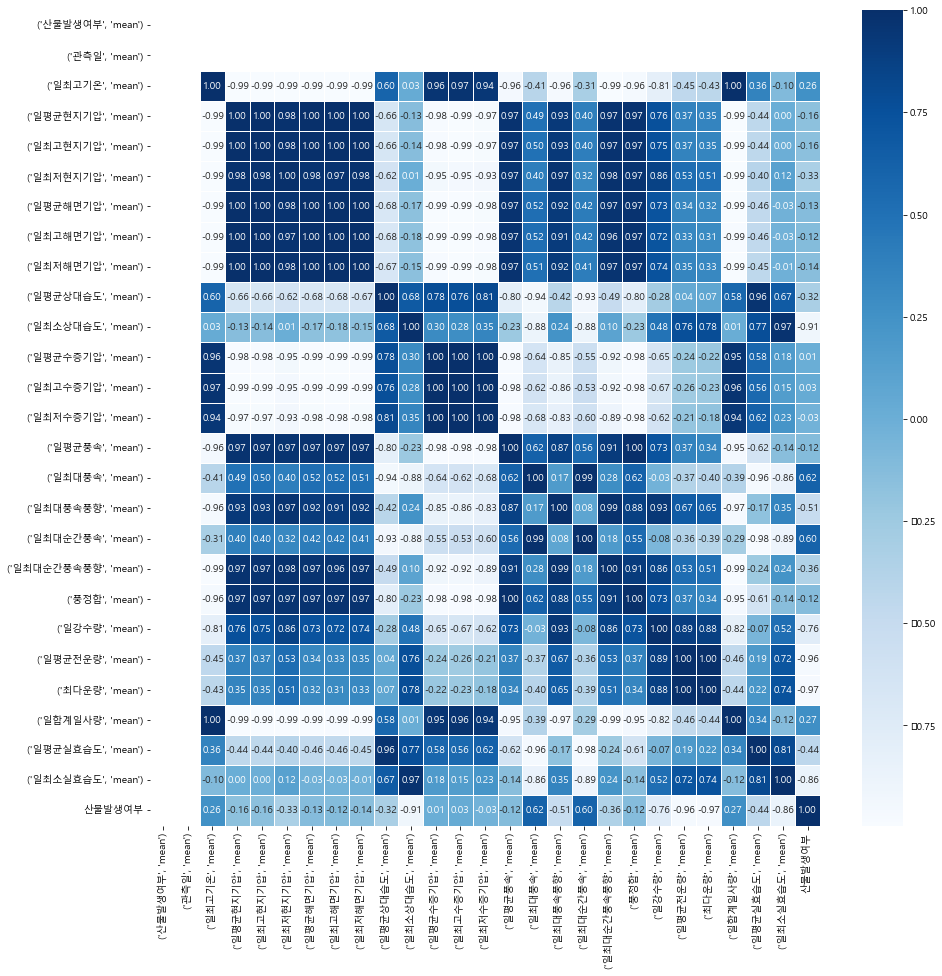

In [15]:
# df_new.corr()
# 히트맵 그려보기
plt.figure(figsize=(15, 15))
sns.heatmap(data = df_new.corr(), annot = True
            , fmt = '.2f', linewidths =.5, cmap= 'Blues')

In [16]:
list_col = df_new.columns

import scipy.stats

# scipy.stats.pearsonr(df_new['count'], df_new['산불발생여부'])

for i in list_col:
    cor_p = scipy.stats.pearsonr(df_new[i], df_new['산불발생여부'])
    ind = i
    # df = pd.DataFrame({ind : [cor_p]})
    print(i, cor_p)

('산불발생여부', 'mean') (nan, nan)
('관측일', 'mean') (nan, nan)
('일최고기온', 'mean') (0.25742948258044324, 0.7425705174195567)
('일평균현지기압', 'mean') (-0.16493689491363428, 0.8350631050863657)
('일최고현지기압', 'mean') (-0.15781812426047423, 0.8421818757395257)
('일최저현지기압', 'mean') (-0.32783483583621265, 0.6721651641637874)
('일평균해면기압', 'mean') (-0.1274549256533606, 0.8725450743466394)
('일최고해면기압', 'mean') (-0.1157174890945542, 0.8842825109054457)
('일최저해면기압', 'mean') (-0.1398987166214295, 0.8601012833785705)
('일평균상대습도', 'mean') (-0.31765503216218716, 0.6823449678378128)
('일최소상대습도', 'mean') (-0.910506532196131, 0.08949346780386902)
('일평균수증기압', 'mean') (0.00974200861742272, 0.9902579913825773)
('일최고수증기압', 'mean') (0.027019490899146126, 0.9729805091008539)
('일최저수증기압', 'mean') (-0.03153288654311229, 0.9684671134568877)
('일평균풍속', 'mean') (-0.12118954520673833, 0.8788104547932617)
('일최대풍속', 'mean') (0.6152114005286048, 0.3847885994713952)
('일최대풍속풍향', 'mean') (-0.5112206066783731, 0.4887793933216269)
('일최대순간풍속', '

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
